In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_parquet('../reviews/reviews.parquet')
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.drop(columns=['steam_purchase'], inplace=True)
df.to_parquet('../reviews/reviews_v1.parquet', index=False)

In [3]:
n_rows = df.shape[0]
n_games = len(df['game'].unique())
n_authors = len(df['author'].unique())

print(f'Reviews: {n_rows}')
print(f'Quantidade de jogos: {n_games}')
print(f'Quantidade de usuários: {n_authors}')

Reviews: 2110458
Quantidade de jogos: 808
Quantidade de usuários: 1103870


In [4]:
count_positive_reviews = df[df['review'] == '👍'].shape[0]
print(f"Reviews que contém apenas 👍: {count_positive_reviews}")

Reviews que contém apenas 👍: 1355


/var/folders/kl/n_yd388n3n38s861kmsjpvqw0000gn/T/ipykernel_56308/1420456476.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='voted_up_numeric', data=df, palette={'1': 'green', '0': 'red'}, legend=False)
/var/folders/kl/n_yd388n3n38s861kmsjpvqw0000gn/T/ipykernel_56308/1420456476.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Negativo', 'Positivo'], rotation=0, fontsize=14)


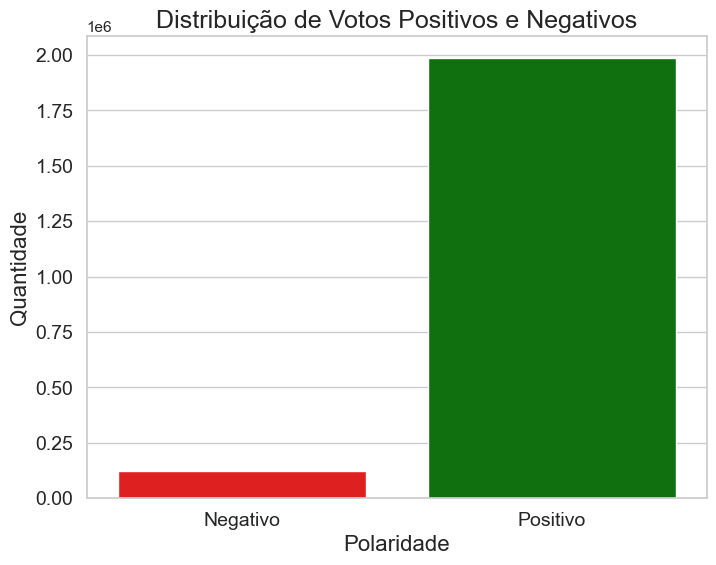

In [5]:
import seaborn as sns

sns.set_theme(style="whitegrid")


# Transformando os valores booleanos em numéricos
df['voted_up_numeric'] = df['voted_up'].map({True: 1, False: 0})

# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='voted_up_numeric', data=df, palette={'1': 'green', '0': 'red'}, legend=False)

# Ajustando os rótulos do eixo x
ax.set_xticklabels(['Negativo', 'Positivo'], rotation=0, fontsize=14)

# Adicionando rótulos e título com fontes aumentadas
ax.set_xlabel('Polaridade', fontsize=16)
ax.set_ylabel('Quantidade', fontsize=16)
ax.set_title('Distribuição de Votos Positivos e Negativos', fontsize=18)

# Ajustando o tamanho das fontes dos ticks
ax.tick_params(axis='both', which='major', labelsize=14)

# Salvando o gráfico com alta resolução
plt.savefig('polaridade_votos.png', dpi=300, bbox_inches='tight')

# Mostrando o gráfico
plt.show()

Text(0.5, 1.0, 'Nuvem de Palavras das Avaliações')

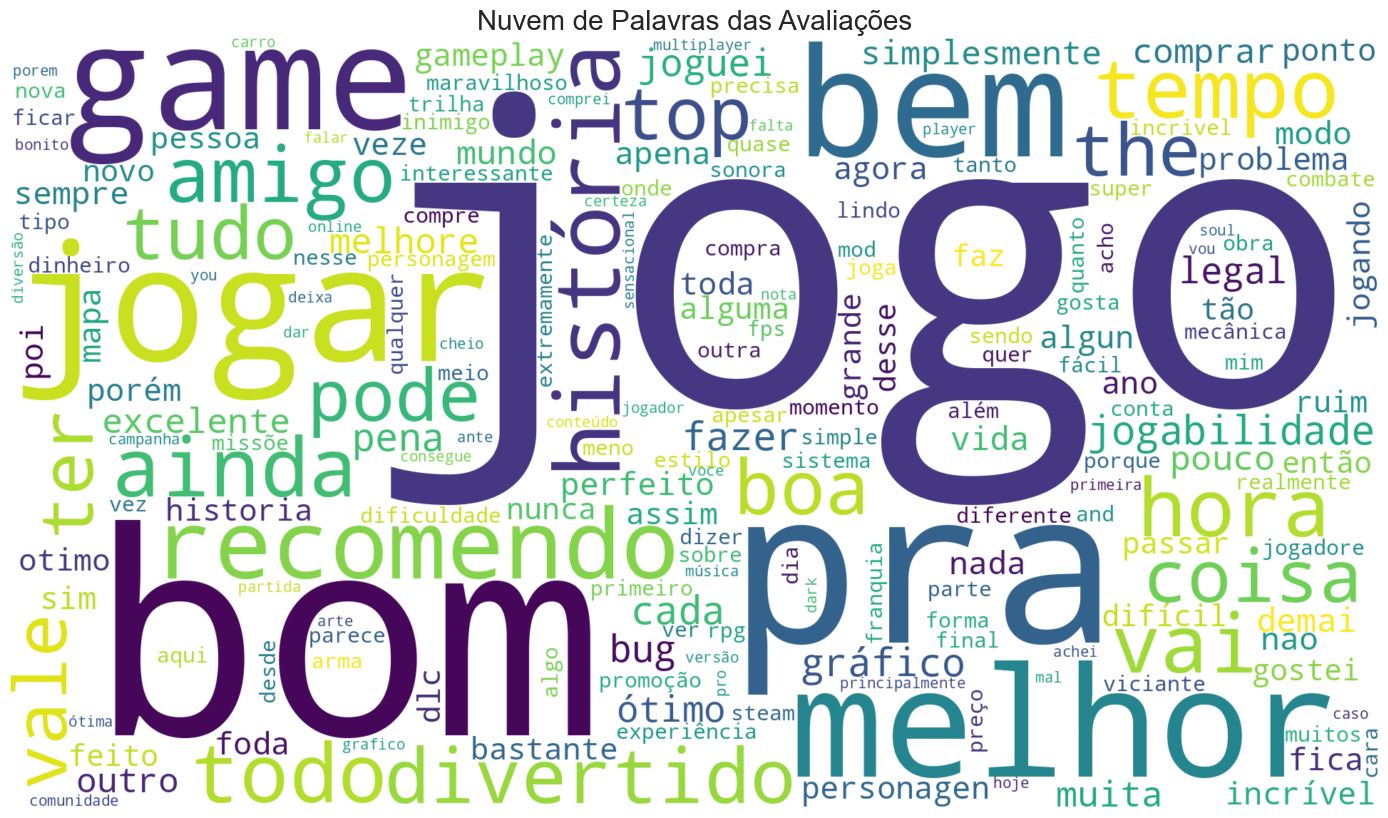

In [6]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re

# Função para remover emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Função para preparar texto (remover caracteres especiais e stopwords)
def preparar_texto(texto):
    if isinstance(texto, str):  # Verificar se o valor é uma string
        texto = texto.lower()
        texto = remove_emojis(texto)  # Remover emojis
        texto = texto.replace(',', '')  # Remover vírgulas
        tokens = texto.split()
        tokens_limpos = [palavra for palavra in tokens if palavra not in stopwords_set]
        return ' '.join(tokens_limpos)
    return ''

# Carregar stopwords
stopwords_set = set(stopwords.words('portuguese'))

# Aplicando a função ao dataframe
df['review_limpo'] = df['review'].apply(preparar_texto)

# Juntando todas as avaliações limpas em um único texto
all_reviews_limpos = ' '.join(df['review_limpo'].dropna())

# Gerando a nuvem de palavras
wordcloud = WordCloud(
    width=1920, 
    height=1080, 
    background_color='white', 
    stopwords=stopwords_set,
    min_word_length=3,
    collocations=False,  # Evitar repetição de palavras
    colormap='viridis',  # Escolher uma coloração agradável
    contour_color='steelblue',
    contour_width=1
).generate(all_reviews_limpos)

# Salvando a nuvem de palavras como PNG com 300 DPI
wordcloud.to_file('nuvem_palavras.png')

# Plotando a nuvem de palavras filtrada
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras das Avaliações', fontsize=20)



In [7]:
early_access = df[df['written_during_early_access'] == True]
pos_early_access = early_access['voted_up'].mean()
pos_lancamento = df[df['written_during_early_access'] == False]['voted_up'].mean()

print(f'Porcentagem de reviews positivas em early access: {pos_early_access:.2f}')
print(f'Porcentagem de reviews positivas no lançamento: {pos_lancamento:.2f}')
print(f'Porcentagem de reviews positivas no total: {df["voted_up"].mean():.2f}')

Porcentagem de reviews positivas em early access: 0.94
Porcentagem de reviews positivas no lançamento: 0.94
Porcentagem de reviews positivas no total: 0.94


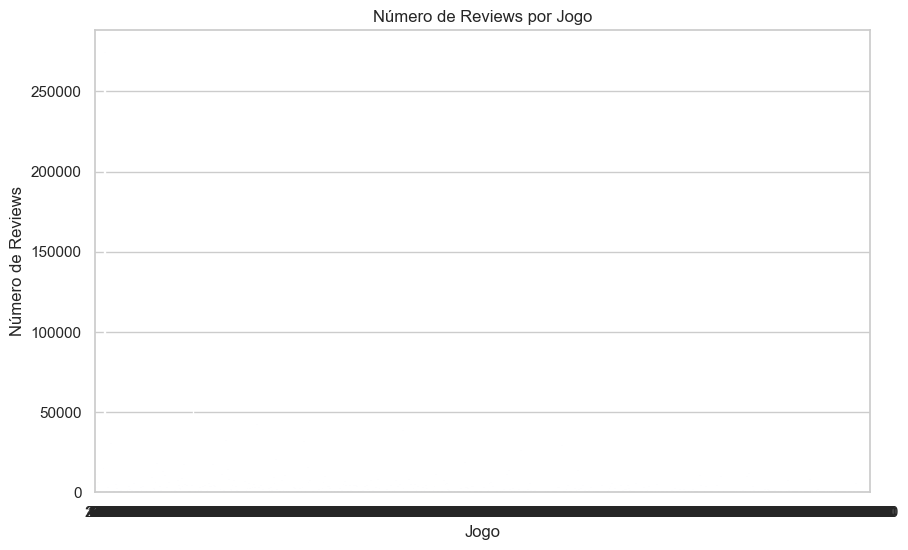

In [8]:
import seaborn as sns

reviews_por_jogo = df['game'].value_counts().reset_index()
reviews_por_jogo.columns = ['game', 'reviews']

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=reviews_por_jogo, x='game', y='reviews')
plt.title('Número de Reviews por Jogo')
plt.xlabel('Jogo')
plt.ylabel('Número de Reviews')
plt.show()

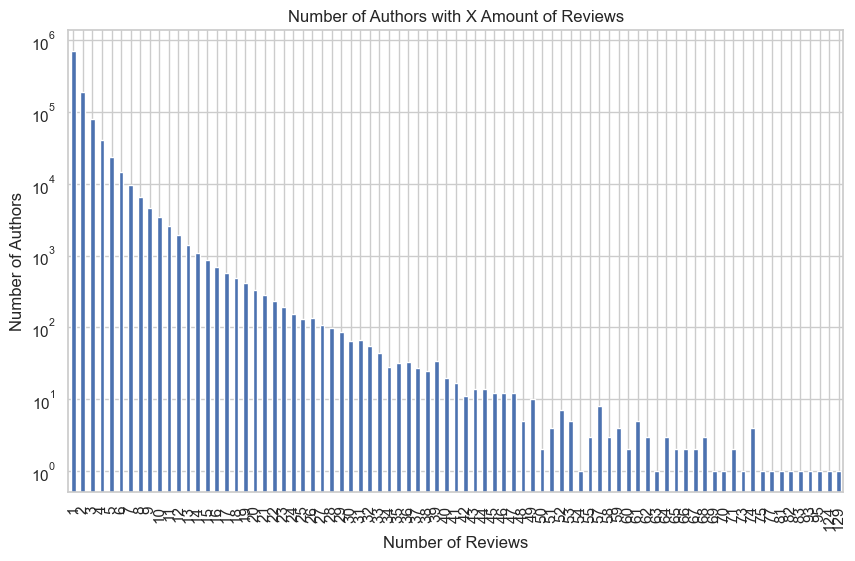

In [9]:
author_reviews = df['author'].value_counts()
# Plotting the number of authors with X amount of reviews
plt.figure(figsize=(10, 6))
plt.yscale('log')
author_reviews.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Authors with X Amount of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Authors')
plt.show()